In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)  # 生成[0, 1)的 形状是100x1 的随机数

y = 4 + 3 * X + np.random.randn(100, 1) # 生成标准正态分布随机数，常用于噪音

$$\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_nx_n$$
$$\mathrm{MSE}=(X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta^{\mathrm{T}}x^{(i)}-y^{(i)})^2$$
$$\hat{\theta}=(X^\mathrm{T}X)^{-1}X^\mathrm{T}y$$


In [2]:
# 直接法求出θ的值
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
# 使用sklearn 求解最小二乘结果，同样是直接法
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_   # 截距和系数

(array([3.97252635]), array([[3.09775085]]))

# 梯度下降

                                批量梯度下降                            

$$\mathrm{V}_{\theta}\mathrm{MSE}(\boldsymbol{\theta})=\left(\frac{\partial}{\partial\theta_0}\mathrm{MSE}(\boldsymbol{\theta})\\\frac{\partial}{\partial\theta_1}\mathrm{MSE}(\boldsymbol{\theta})\\\vdots\\\frac{\partial}{\partial\theta_n}\mathrm{MSE}(\boldsymbol{\theta})\right)=\frac{2}{m}X^{\intercal}(\boldsymbol{X\theta}-\boldsymbol{y})$$
$$\theta^\text{(下一步)}{ = \theta - \eta }\nabla_{\theta}\mathrm{MSE}(\theta)$$

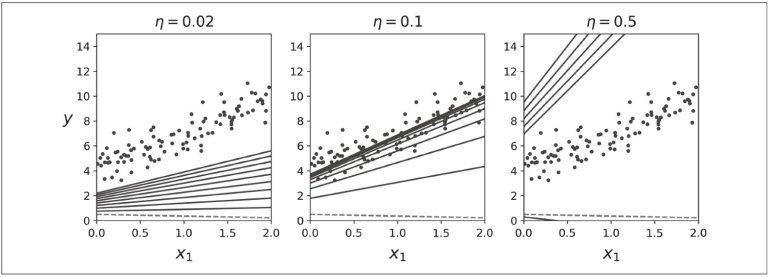

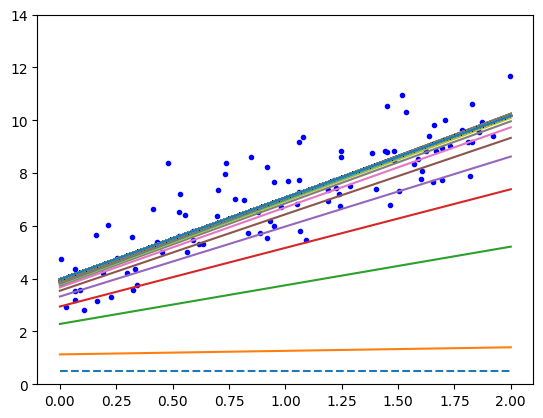

In [4]:
# 在计算梯度下降的每一步时，都是基于完整的训练集X的。
# 这就是为什么该算法会被称为批量梯度下降

plt.ylim(top=14, bottom=0)
plt.plot(X, y, 'b.')

# 批量梯度下降法
eta = 0.1 # 学习率
n_iterations = 1000 # 迭代次数
m = 100
theta = np.random.randn(2,1) # 初始化参数
temp = [0,2]
plt.plot(temp, [0.5,0.5], linestyle='dashed')
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 梯度，该公式详见pdf
    y_predict_line = [theta[0], 2*theta[1]+theta[0]]
    theta = theta - eta * gradients
    plt.plot(temp, y_predict_line)

# 要找到合适的学习率，可以使用网格搜索（见第2章）。
# 但是你可能需要限制迭代次数，这样网格搜索可以淘汰掉那些收敛耗时太长的模型


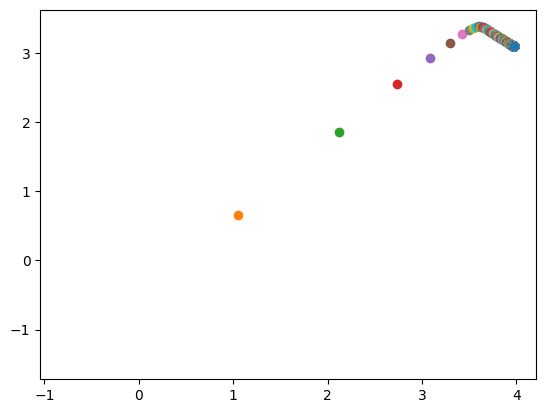

In [5]:
# 批量梯度下降法

eta = 0.1 # 学习率
n_iterations = 1000 # 迭代次数
m = 100
theta = np.random.randn(2,1) # 初始化参数

plt.plot(theta[0], theta[1], linestyle='solid')
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 梯度，该公式详见pdf
    theta = theta - eta * gradients
    plt.plot(theta[0], theta[1], marker='o')


                        随机梯度下降                        

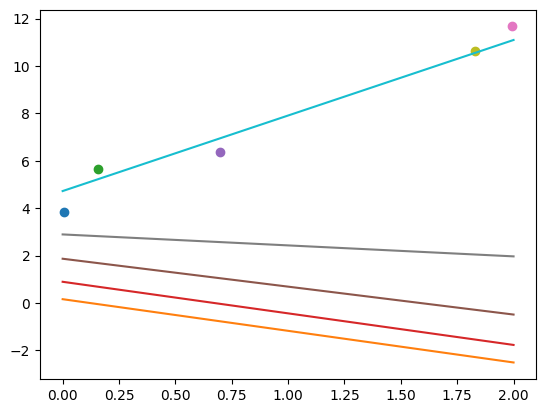

In [6]:
# 随机梯度下降，每一步在训练集中随机选择一个实例，并且仅基于该单个实例来计算梯度。
# 显然，这让算法变得快多了，因为每次迭代都只需要操作少量的数据

def paint(x, y, theta):
    plt.plot(x, y, 'o')
    y_predict_line = [theta[0], 2*theta[1]+theta[0]]
    plt.plot([0, 2], y_predict_line)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # 根据范围随机生成一个数字，这里m是上界，0-m
        xi = X_b[random_index:random_index+1]   # 随机取一个样本
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)    # 计算单个样本的梯度
        eta = learning_schedule(epoch * m + i)  # 一个会变化的学习率，逐步降低学习率
        
        if i in range(0,5):
            paint(xi[:,1], yi, theta)
        theta = theta - eta * gradients
    break

plt.show()

# 随机梯度下降就是，每次抽取一个样本来构建MSE距离函数，然后求导

In [7]:
# sklearn 随机梯度下降
from sklearn.linear_model import SGDRegressor

# 该类默认优化平方误差成本函数。以下代码最多可运行1000个轮次，或者直到一个轮次期间损失下降小于0.001为止
# 以0.1（eta0=0.1）的学习率开始。最后，它不使用任何正则化（penalty=None
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

                    小批量梯度下降                  

# 多项式回归

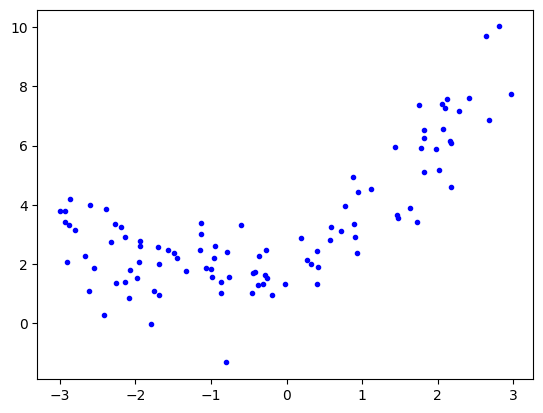

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')

In [9]:
# 使用Scikit-Learn的PolynomialFeatures类来转换训练数据，
# 将训练集中每个特征的平方（二次多项式）添加为新特征

# PolynomialFeatures还可以将特征的所有组合添加到给定的多项式阶数。
# 例如，如果有两个特征a和b，则degree=3的PolynomialFeatures不仅会添加特征a2、a3、b2和b3，还会添加组合ab、a2b和ab2

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0] # X_poly现在包含X的原始特征以及该特征的平方

(array([-1.14302724]), array([-1.14302724,  1.30651127]))

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_   # 截距；二次项x²系数、一次项x系数

(array([2.14142855]), array([[1.00485716, 0.47555821]]))

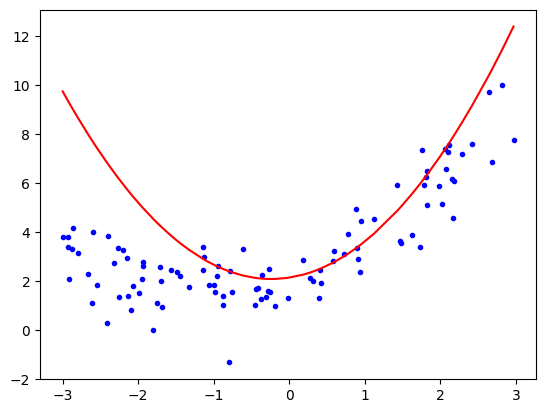

In [11]:
X_sort = np.sort(X, axis=0)
y_predict = lin_reg.coef_[0][0]*X_sort**2 + lin_reg.coef_[0][1]*X_sort +lin_reg.intercept_

plt.plot(X, y, 'b.')
plt.plot(X_sort, y_predict, 'r')

                        学习曲线                        

In [12]:
# 在第2章中，你使用交叉验证来估计模型的泛化性能
# 还有一种方法是观察学习曲线：这个曲线绘制的是模型在训练集和验证集上关于训练集大小（或训练迭代）的性能函数

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    # 每次循环都是增加一点样本数来训练模型，然后用得出的模型计算在训练集和测试集上的RMSE
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("the X_train's size")
    plt.ylabel("RMSE")


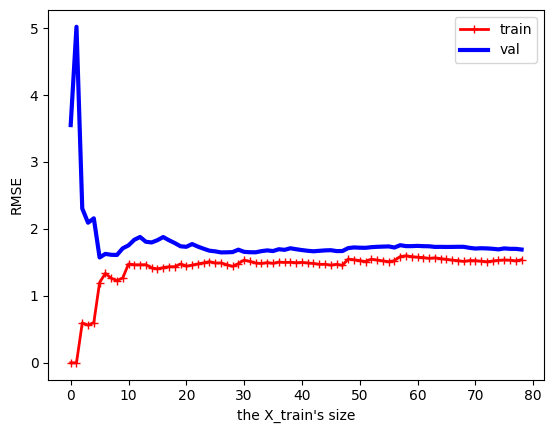

In [16]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# 首先，让我们看一下在训练数据上的性能：当训练集中只有一个或两个实例时，模型可以很好地拟合它们，
# 这就是曲线从零开始的原因。但是，随着将新实例添加到训练集中，模型就不可能完美地拟合训练数据，
# 这既因为数据有噪声，又因为它根本不是线性的。因此，训练数据上的误差会一直上升，直到达到平稳状态，
# 此时在训练集中添加新实例并不会使平均误差变好或变差。

# 现在让我们看一下模型在验证数据上的性能。当在很少的训练实例上训练模型时，
# 它无法正确泛化，这就是验证误差最初很大的原因。然后，随着模型经历更多的训练示例，
# 它开始学习，因此验证错误逐渐降低。但是，直线不能很好地对数据进行建模，
# 因此误差最终达到一个平稳的状态，非常接近另外一条曲线

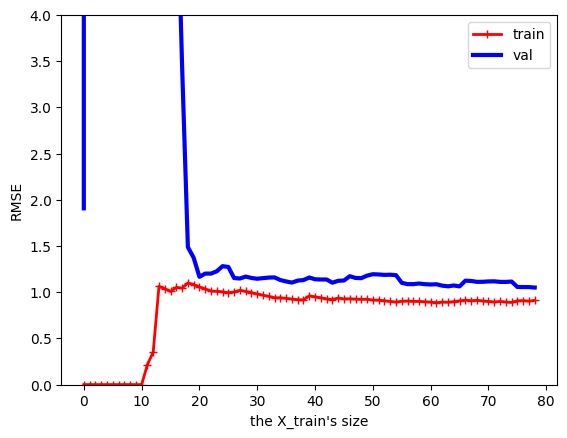

In [17]:
# 现在让我们看一下在相同数据上的10阶多项式模型的学习曲线

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])

plt.ylim(top=4)
plot_learning_curves(polynomial_regression, X, y)
# 改善过拟合模型的一种方法是向其提供更多的训练数据，直到验证误差达到训练误差为止

# 正则化线性模型

            岭回归          

$$J(\boldsymbol{\theta})=\mathrm{MSE}(\boldsymbol{\theta})+\alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$$
$$\hat{\theta}=(X^\mathrm{T}X+\alpha A)^{-1}X^\mathrm{T}y$$

In [16]:
# 在执行岭回归之前缩放数据（例如使用StandardScaler）很重要，
# 因为它对输入特征的缩放敏感。大多数正则化模型都需要如此

In [17]:
# Scikit-Learn和闭式解

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict(np.array([[1.5]]))

array([[4.72648417]])

In [18]:
# Scikit-Learn 随机梯度下降法训练岭回归模型

# 超参数penalty设置的是使用正则项的类型。设为"l2"表示希望SGD
# 在成本函数中添加一个正则项，等于权重向量的 2范数的平方的一半，即岭回归

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict(np.array([[1.5]]))

array([4.71188972])

                        Lasso回归                       

$$J(\theta)=\operatorname{MSE}(\theta)+\alpha\sum_{i=1}^n\lvert\theta_i\rvert $$

In [19]:
# Lasso回归模型闭式解
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict(np.array([[1.5]]))

array([4.67742297])

In [20]:
# Scikit-Learn 随机梯度下降法训练Lasso回归模型

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict(np.array([[1.5]]))

array([4.70004614])

                    弹性网络                

$$J(\boldsymbol{\theta})=\mathrm{MSE}(\boldsymbol{\theta})+r\alpha\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$$

In [21]:
# 弹性网络是介于岭回归和Lasso回归之间的中间地带。
# 正则项是岭和Lasso正则项的简单混合，你可以控制混合比r。
# 当r=0时，弹性网络等效于岭回归，而当r=1时，弹性网络等效于Lasso回归

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)   # l1_ratio对应于混合比r
elastic_net.fit(X, y)
elastic_net.predict(np.array([[1.5]]))

array([4.67990241])

                    提前停止                        

2.107708858289003

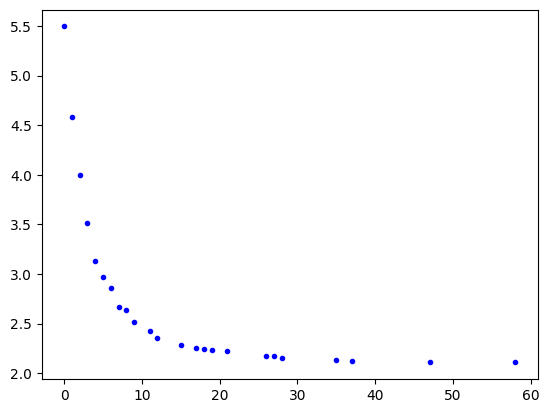

In [22]:
# 提前停止法是一种正则化方法，
# 每次循环都会
from sklearn.base import clone
from sklearn.calibration import column_or_1d
from sklearn.preprocessing import StandardScaler


# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

y = column_or_1d(y, warn=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# max_iter是随机梯度下降法的最大迭代次数，如果在迭代完之前误差小于tol则停止，否则继续
# warm_start是模型在下次调用fit函数时，沿用上一次训练时的 θ和 eta
# learning_rate="constant" 是学习率不变
sgd_reg = SGDRegressor(max_iter=35, tol=0.1, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")    # inf是无穷大
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        plt.plot(epoch, minimum_val_error, 'b.')
        best_epoch = epoch
        best_model = clone(sgd_reg)

minimum_val_error
# 请注意，在使用warm_start=True的情况下，当调用fit（）方法时，
# 它将在停止的地方继续训练，而不是从头开始

# 刚开始的几轮训练 SGDRegressor的iter达到35都未使误差小于tol，
# 由于warm_start=True，后面的训练会沿用上一次的θ，所以情况越来越好

# 逻辑回归

逻辑回归模型也是计算输入特征的加权和（加上偏置项）
$$\hat{p}=h_\theta(x)=\sigma(x^\mathrm{T}\theta)$$
$$\sigma(t)=\frac{1}{1+\exp(-t)}$$
$$J(\boldsymbol{\theta})=-\frac1m\sum_{i=1}^m[y^{(i)}\log(\hat{p}^{(i)})+(1-y^{(i)})\log(1-\hat{p}^{(i)})]$$

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int8) # 1 if Iris virginica, else 0

In [24]:
# 控制Scikit-Learn LogisticRegression模型的正则化强度的超参数不是alpha，
# 而是反值C。C值越高，对模型的正则化越少

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

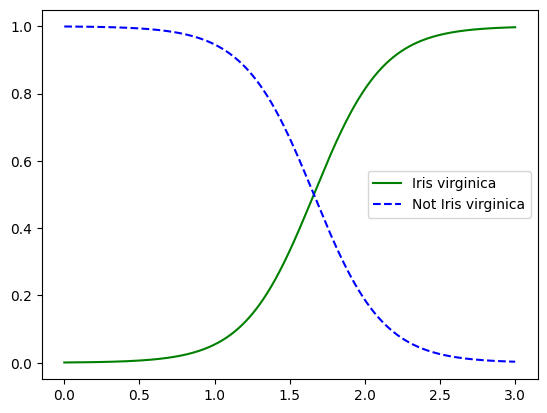

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
# + more Matplotlib code to make the image look pretty

# Softmax回归

$$s_k(x)=x^\mathrm{T}\theta^{(k)}$$
$$\hat{p}_k=\sigma(s(x))_k=\frac{\exp(s_k(x))}{\sum_{j=1}^K\exp(s_j(x))}$$
$$J(\boldsymbol{\Theta})=-\frac1m\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}\log(\hat{p}_k^{(i)})$$

In [26]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [29]:
softmax_reg.predict([[5, 2]]),softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]]))